In [1]:
import cv2
import matplotlib.pyplot as plt

import numpy as np

In [2]:
from images import (
    letterbox,
    ImgSize,
    img_resize,
    inverse_letterbox_coordinate_transform,
)

ModuleNotFoundError: No module named 'images'

In [ ]:
img = cv2.imread("../datasets/test/elephant-2.jpg")
img_letterboxed = letterbox(np.asarray(img), ImgSize(640, 640))


# Save the image
cv2.imwrite("../datasets/test/elephant-5.jpg", img_letterboxed)

[ WARN:0@0.233] global loadsave.cpp:248 findDecoder imread_('../datasets/test/elephant-2.jpg'): can't open/read file: check file path/integrity


IndexError: tuple index out of range

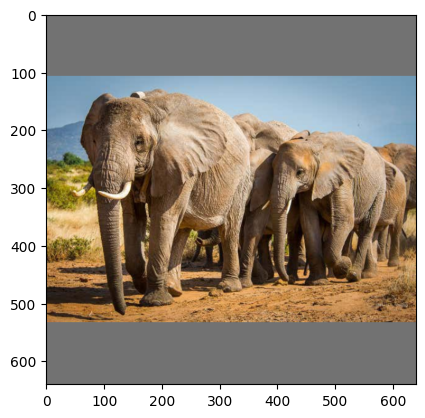

In [ ]:
# One common reason for this issue is the ordering of color channels.
# OpenCV uses BGR (Blue, Green, Red) channel order by default,
# while Matplotlib uses RGB (Red, Green, Blue) order.
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_letterboxed = letterbox(np.asarray(img_rgb), ImgSize(640, 640))
plt.imshow(img_letterboxed)

To map a point from the img_letterboxed image to the original image, you can use the following formula:

x_original = (x_letterboxed - pad_w) \* original_width / letterboxed_width

y_original = (y_letterboxed - pad_h) \* original_height / letterboxed_height


<function matplotlib.pyplot.show(close=None, block=None)>

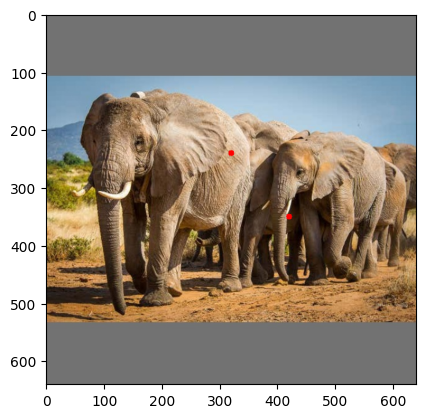

In [ ]:
# Load the image
img = cv2.imread("../datasets/test/elephant-5.jpg")

letterboxed_size = (img_letterboxed.shape[1], img_letterboxed.shape[0])
original_size = (img.shape[1], img.shape[0])
# Define the x,y coordinate of the point
x1, y1 = 320, 240
x2, y2 = 420, 350

# Draw a circle at the specified point
cv2.circle(img, (x1, y1), 5, (0, 0, 255), -1)
cv2.circle(img, (x2, y2), 5, (0, 0, 255), -1)


# Display the letterboxed image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

[(300, 125, 394, 228)]


<function matplotlib.pyplot.show(close=None, block=None)>

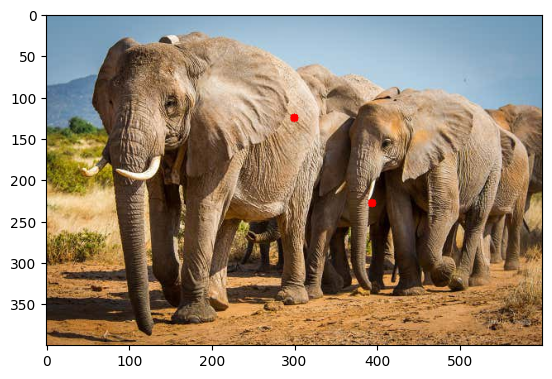

In [ ]:
# Load the image
img = cv2.imread("../datasets/test/elephant-2.jpg")

# Define the x,y coordinate of the point
# x, y = (300, 125)
coordinates = inverse_letterbox_coordinate_transform(
    # [(x1, y1, x2, y2)]
    [(320, 240, 420, 350)],
    ImgSize(img.shape[1], img.shape[0]),
    ImgSize(640, 640),
)

print(coordinates)

x1 = coordinates[0][0]
y1 = coordinates[0][1]

x2 = coordinates[0][2]
y2 = coordinates[0][3]

# print(round(5 * (400 / 600))) # to make size of point to the letterbox
# Draw a circle at the specified point
cv2.circle(img, (x1, y1), 5, (0, 0, 255), -1)
cv2.circle(img, (x2, y2), 5, (0, 0, 255), -1)

# Display the letterboxed image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

In [ ]:
import sys

sys.path.append("../remx/utils")

from images_predict_fn import (
  load_images
)

In [ ]:
load_images("./datasets")

./datasets/elephant/test-elephant.jpg
./datasets/axis-deer/test-axis-deer.jpg


In [ ]:

from typing import List, Tuple
BBox = Tuple[float, float, float, float]  # (x1, y1, x2, y2) for single bounding box

class ImgSize:
    def __init__(self, width: int, height: int, channel: int = 3) -> None:
        self.height = height
        self.width = width
        self.channel = channel

    def get_tuple(self) -> tuple:
        return (self.width, self.height, self.channel)



def letterbox_coordinate_transform(bboxes: List[BBox], original_size: ImgSize, letterboxed_size: ImgSize) -> List[BBox]:
    # Calculate the aspect ratio of the original and letterboxed sizes
    aspect_ratio = min(
        letterboxed_size.height / original_size.width,
        letterboxed_size.width / original_size.height,
    )

    # Calculate the amount of padding added during the letterbox operation
    pad_w = letterboxed_size.width - (aspect_ratio * original_size.width)
    pad_h = letterboxed_size.height - (aspect_ratio * original_size.height)

    # Convert the bounding box coordinates to the letterboxed image dimensions
    letterboxed_bboxes = []
    for bbox in bboxes:
        x1, y1, x2, y2 = bbox
        # (x1, y1) is the top-left corner of single bounding box
        map_x1 = round((x1 + pad_w / (2 * aspect_ratio)) * aspect_ratio)
        map_y1 = round((y1 + pad_h / (2 * aspect_ratio)) * aspect_ratio)

        # (x2, y2) is the bottom-right corner of single bounding box
        map_x2 = round((x2 + pad_w / (2 * aspect_ratio)) * aspect_ratio)
        map_y2 = round((y2 + pad_h / (2 * aspect_ratio)) * aspect_ratio)
        letterboxed_bboxes.append((map_x1, map_y1, map_x2, map_y2))
    return letterboxed_bboxes


In [ ]:
bboxes = letterbox_coordinate_transform(bboxes=[(256, 390, 950, 902)], original_size=ImgSize(2048, 1536), letterboxed_size=ImgSize(640, 640))
bboxes

[(80, 202, 297, 362)]

In [2]:
import sys

sys.path.append("../remx/utils")


from images import coordinate_normalize, ImgSize, labels_dir_xyxy2xywh

In [ ]:
coordinate_normalize(bboxes=[(181.12, 374.4, 542.08, 556.8)], original_size=ImgSize(1024, 768), letterboxed_size=ImgSize(640, 640))

[(113, 314, 339, 428)]


[(0.1765625, 0.490625, 0.5296875, 0.66875)]

In [3]:
def xyxy2xywh(x):
    """
    Convert bounding box (x1, y1, x2, y2) to bounding box (x, y, w, h).
    """
    y = np.copy(x)
    y[..., 0] = (x[..., 0] + x[..., 2]) / 2  # x center
    y[..., 1] = (x[..., 1] + x[..., 3]) / 2  # y center
    y[..., 2] = x[..., 2] - x[..., 0]        # width
    y[..., 3] = x[..., 3] - x[..., 1]        # height
    return y

def xywh2xyxy(x):
    """
    yolov8 provide bounding box (x, y, w, h).
    Convert bounding box (x, y, w, h) to bounding box (x1, y1, x2, y2)
    """
    y = np.copy(x)
    y[..., 0] = x[..., 0] - x[..., 2] / 2
    y[..., 1] = x[..., 1] - x[..., 3] / 2
    y[..., 2] = x[..., 0] + x[..., 2] / 2
    y[..., 3] = x[..., 1] + x[..., 3] / 2
    return y




[249 211 387 476]


<function matplotlib.pyplot.show(close=None, block=None)>

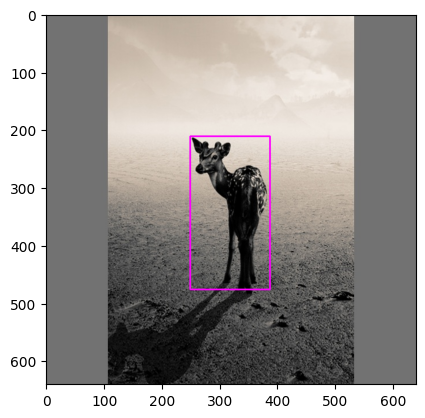

In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

def xywh2xyxy(x):
    """
    yolov8 provide bounding box (x, y, w, h).
    Convert bounding box (x, y, w, h) to bounding box (x1, y1, x2, y2)
    """
    y = np.copy(x)
    y[..., 0] = x[..., 0] - x[..., 2] / 2
    y[..., 1] = x[..., 1] - x[..., 3] / 2
    y[..., 2] = x[..., 0] + x[..., 2] / 2
    y[..., 3] = x[..., 1] + x[..., 3] / 2
    return y


img = "./tests/fbde545860c21b29.jpg"
img = cv2.imread(img)



bbox = np.array([0.496875, 0.5375, 0.21562500000000007, 0.41250000000000003])
bbox = xywh2xyxy(bbox)
bbox *= 640
bbox = np.array([int(x) for x in bbox])
print(bbox)
box_color = (255, 0, 255)
cv2.rectangle(img, tuple(bbox[:2]), tuple(bbox[2:]), box_color, 2)

# Display the original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

In [1]:

import cv2
import matplotlib.pyplot as plt
from typing import Tuple

def draw_max_confidence_img(original_img: str, max_confidence_coordinate: Tuple):
    # Load the original image
    img = cv2.imread(original_img)

    # Unpack the coordinates
    x1, y1, x2, y2 = max_confidence_coordinate

    # Draw the rectangle on the image
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2) # Green color, thickness=2

    # Convert BGR image to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()





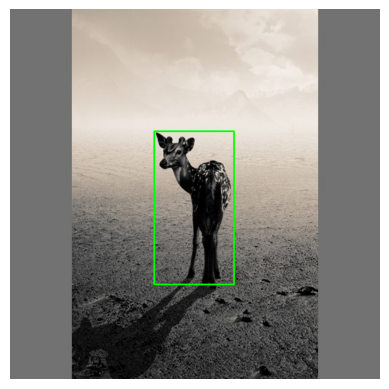